In [191]:
#Logging into Instagram
from selenium import webdriver

#Initiating a web browser session
driver=webdriver.Chrome(executable_path='/Users/shabeggill/Downloads/chromedriver')

#Going to instagram login page
driver.get('https://www.instagram.com/')

In [192]:
#locating username box and filling it
a=driver.find_elements_by_tag_name('input')
for i in a:
    if i.get_attribute('aria-label')=="Phone number, username, or email" and i.get_attribute('name')=="username":
        i.send_keys('SAMPLE USERNAME')

    #locating password box and filling it
    if i.get_attribute('aria-label')=="Password" and i.get_attribute('name')=="password":
        i.send_keys('SAMPLE PASSWORD')

#locating the login button and clicking on it
login_btn=driver.find_element_by_xpath('//button[contains(@class,"sqdOP")]/div')
login_btn.click()

In [193]:
import time
#Save your login info? This box appears with "Save Info" and "Not Now" options
#If I don't want to Save my info
time.sleep(2)
info=driver.find_element_by_xpath('//div[contains(@class,"cmbtv")]/button')
info.click()

In [194]:
#Turn on Notifications? This box appears with Turn On and Not Now options
#If I don't want to turn on notifications for now
time.sleep(2)
notif=driver.find_element_by_xpath('//div[contains(@class,"mt3GC")]/button[2]')
notif.click()

## Question 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
### 2. Now Find the number of posts these handles have done in the previous 3 days.
### 3. Depict this information using a suitable graph.

In [74]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import numpy as np
import matplotlib.pyplot as plt

### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [52]:
#Locating the search bar and typing food
search=driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')
search.send_keys('food')

In [56]:
#creating an array for instagram handles
food=[]

#Locating instagram handles
handles=driver.find_elements_by_tag_name('span')
for i in handles:
    if i.get_attribute('class')=='Ap253':
        food.append(i.text)

In [57]:
#Getting the first 10 handles

#Creating an array for first 10 handles
pages=[]

for i in food[0:10]:
    pages.append(i)
    print(i)

foodtalkindia
great.food.eaters
senseandbakeability
food_by_krishna
foodys
sailusfood
food
buzzfeedfood
caarafood
yourfoodlab


In [58]:
#Creating an array for number of followers of the 10 handles
followers=[]

#Getting followers for each of the 10 handles
for i in range(10):

    #To go to the page of the hande
    driver.get('https://www.instagram.com/'+pages[i]+'/')
    time.sleep(2)
    
    #To get the count of followers of the page
    num=driver.find_element_by_xpath('//a[contains(@class,"-nal3 ")]/span')
    num_followers=num.get_attribute('title')
    
    #removing commas from string and converting string to int
    num_followers=int(num_followers.replace(',',''))
    
    followers.append(num_followers)


In [286]:
for i in range(10):
    print('Number of followers of',pages[i],':',followers[i])
    print()

Number of followers of foodtalkindia : 302130

Number of followers of great.food.eaters : 6787

Number of followers of senseandbakeability : 338

Number of followers of food_by_krishna : 217

Number of followers of foodys : 9071908

Number of followers of sailusfood : 49089

Number of followers of food : 77211

Number of followers of buzzfeedfood : 3665425

Number of followers of caarafood : 7856

Number of followers of yourfoodlab : 1392683



In [78]:
#Sorting in decreasing order based on the number of followers
z=sorted(zip(followers,pages),reverse=True)

#Creating an array for followers for top 5 handles
followers_top5=[]

#Creating an array for top 5 handles
pages_top5=[]

#Finding the top 5 handles with highest number of followers
for i in z[0:5]:
    print(i)
    followers_top5.append(i[0])
    pages_top5.append(i[1])

(9071908, 'foodys')
(3665425, 'buzzfeedfood')
(1392683, 'yourfoodlab')
(302130, 'foodtalkindia')
(77211, 'food')


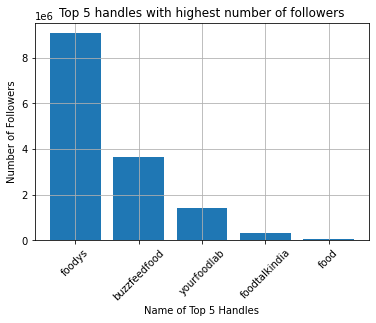

In [85]:
#Plotting a bar graph for top 5 handles with highest number of followers

plt.bar(pages_top5,followers_top5)
plt.xlabel('Name of Top 5 Handles')
plt.ylabel('Number of Followers')
plt.title('Top 5 handles with highest number of followers')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#The scale for y axis here is of the order of 10*6 as can be seen (le6)

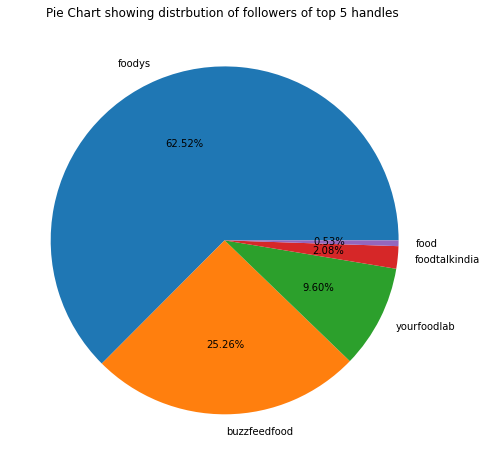

In [279]:
#plotting the pie chart for above
plt.figure(figsize=(8, 8))
plt.pie(followers_top5, labels=pages_top5, autopct='%.2f%%')
plt.title('Pie Chart showing distrbution of followers of top 5 handles')
plt.show()

### 2. Now Find the number of posts these handles have done in the previous 3 days.

In [105]:
#We need to get the number of posts posted by the top 5 handles in the past 3 days

#To append number of posts by each handle in the last 3 days, we'll use an array
posts=[]

#Since this needs to be done for 5 handles, we'll run a for loop 5 times

for i in range(5):
    #To go to the page of the handle
    driver.get('https://www.instagram.com/'+pages_top5[i]+'/')
    
    #To access the first post
    driver.find_element_by_xpath('//div[contains(@class,"_9AhH0")]').click()
    
    #If we start from today i.e. 29th Sept and need to find the posts in past 3 days i.e. 28th Sept, 27th Sept and 26th Sept
    
    #To get count of number of posts, we'll keep a counter
    count=0
    
    while True:
        #Locating the time of post details and clicking on it
        wait=WebDriverWait(driver,30)
        day=wait.until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"c-Yi7")]/time')))
        
        if 'Sep 29' in day.get_attribute('title') or 'Sep 28' in day.get_attribute('title') or 'Sep 27' in day.get_attribute('title') or 
        'Sep 26' in day.get_attribute('title'):
            count+=1
            
            #Locating the next button to move onto next post
            wait=WebDriverWait(driver,30)
            lap=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            lap.click()
            
        else:
            break

    posts.append(count)

In [107]:
#Getting the number of posts posted in the last 3 days by top 5 handles with highest number of followers
for i in range(5):
    print(pages_top5[i],':',posts[i])

foodys : 11
buzzfeedfood : 13
yourfoodlab : 5
foodtalkindia : 3
food : 7


### 3. Depict this information using a suitable graph.

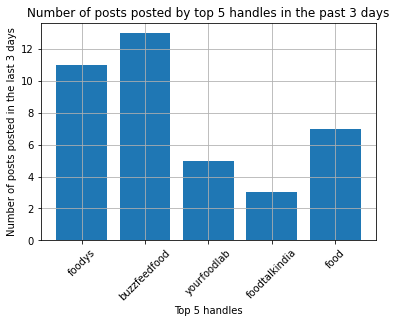

In [109]:
#Plotting a bar graph for the number of posts posted by each of the five handles in the last 3 days
plt.bar(pages_top5,posts)
plt.xlabel('Top 5 handles')
plt.ylabel('Number of posts posted in the last 3 days')
plt.title('Number of posts posted by top 5 handles in the past 3 days')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Question 2 Your friend also needs a list of hashtags that he should use in his posts.
### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
### 3. Create a csv file with two columns : the word and its frequency
### 4. Now, find the hashtags that were most popular among these bloggers
### 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

### 1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [116]:
#Creating an array for storing content of first 10 posts of each of the top 5 handles
page_content=[]

#We need to get content of first 10 posts for each of the five handles. In order to do it for 5 handles 
#we'll need to use a for loop in order to get content of first ten posts for each handle

for i in range(5):
    #To go to the page of the handle
    driver.get('https://www.instagram.com/'+pages_top5[i]+'/')

    #To access the first post
    driver.find_element_by_xpath('//div[contains(@class,"_9AhH0")]').click()

    #Need to scrape content for first 10 posts of each handle. So will use a for loop
    for j in range(10):
        #Locating the content of the post and accessing it
        wait=WebDriverWait(driver,30)
        content=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        page_content.append(content.text)
    
        #Moving onto the next post by clicking on the next button
        wait=WebDriverWait(driver,30)
        lap=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
        lap.click()
                                                   

In [119]:
#Printing the content of the first 10 posts of top 5 handles
for i in page_content:
    print(i)

Pumpkin Spice Late Cupcakes 🎃🍁🧁 It's that time of year! @thecarboholic
Peruvian Pasta with Chicken! 🇵🇪🍝 How many drools would you give this? 🤤 @hungryhugh
Tag someone who deserves to hit the Seafood Tower Jackpot 🎰🦀💯 📍: Hank’s at @gvrcasino
🎶: @machinegunkelly @iamhalsey #ticketstomydownfall #music
Have you ever had Lobster Ravioli? 🦞🤤🔥

@bottiglialv at @gvrcasino is THE spot to be! Staying off of the strip in Las Vegas is hands down the move. Especially during a pandemic! 🎶: @machinegunkelly @bear #music #ticketstomydownfall
Biscoff Cookie Butter Cheesecake! 😭 5/5 drools 🤤🤤🤤🤤🤤 How many would you give it? @succulentbite
If your dessert ain’t on fire... send it back immediately! 🤤🔥 Hank’s at @gvrcasino in Las Vegas is a spot you should not miss out on! Next time you’re thinking of Las Vegas think of this dessert at @gvrcasino 🎰
These Japanese sandwiches hit wayyyy different 🇯🇵🥪 How many drools would you give these!? 🤤 @paulsfoodhaul
Chocolate Pound Cake recipe! MAKE THIS. You won't be s

### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [177]:
#Creating a dictionary for keeping count of frequency of each word used in all the scraped posts
d={}

for i in page_content:
    for j in i.split():
        d[j]=d.get(j,0)+1
        
for i in d:
    print(i,':',d[i])

Pumpkin : 3
Spice : 2
Late : 1
Cupcakes : 1
🎃🍁🧁 : 1
It's : 2
that : 19
time : 6
of : 54
year! : 1
@thecarboholic : 1
Peruvian : 1
Pasta : 1
with : 38
Chicken! : 1
🇵🇪🍝 : 1
How : 4
many : 3
drools : 3
would : 5
you : 30
give : 5
this? : 1
🤤 : 4
@hungryhugh : 1
Tag : 1
someone : 1
who : 1
deserves : 1
to : 66
hit : 2
the : 100
Seafood : 1
Tower : 1
Jackpot : 1
🎰🦀💯 : 1
📍: : 1
Hank’s : 2
at : 14
@gvrcasino : 4
🎶: : 2
@machinegunkelly : 2
@iamhalsey : 1
#ticketstomydownfall : 2
#music : 2
Have : 2
ever : 3
had : 3
Lobster : 1
Ravioli? : 1
🦞🤤🔥 : 1
@bottiglialv : 1
is : 55
THE : 2
spot : 2
be! : 1
Staying : 1
off : 1
strip : 1
in : 47
Las : 4
Vegas : 4
hands : 2
down : 2
move. : 1
Especially : 2
during : 1
a : 65
pandemic! : 1
@bear : 1
Biscoff : 1
Cookie : 1
Butter : 3
Cheesecake! : 1
😭 : 1
5/5 : 1
🤤🤤🤤🤤🤤 : 1
it? : 2
@succulentbite : 2
If : 3
your : 25
dessert : 2
ain’t : 2
on : 22
fire... : 1
send : 1
it : 25
back : 3
immediately! : 1
🤤🔥 : 1
should : 3
not : 6
miss : 1
out : 20
on! : 2
Next :

there. : 1
hitch : 1
premises : 1
bang : 1
opposite : 1
run : 1
imperious : 1
Madame : 1
Mallory : 1
{Mirren}. : 1
spices : 1
sauces : 1
war : 1
each : 1
other. : 1
All : 1
leads, : 1
few : 1
dollops : 1
racial : 1
antagonism, : 1
harmony : 1
end. : 1
portrayal : 1
worlds : 1
colliding : 1
boy’s : 1
drive : 1
find : 1
comfort : 2
every : 1
pot, : 1
wherever : 1
may : 1
fun : 1
watch : 1
sure! : 1
Missed : 1
joining : 1
us : 3
Sip : 3
Paint : 3
session? : 1
We : 2
fix! : 1
Here’s : 2
chance : 1
@bombaysapphire : 2
Kit : 1
partner : 2
#StirCreativity : 2
🎨🍸 : 1
• : 3
Mumbai: : 1
Taj : 1
Lands : 1
End, : 1
Hakassan, : 1
JW : 1
Marriott : 2
Juhu, : 1
Koko, : 1
Four : 2
Seasons : 1
Jaipur: : 1
Marriott, : 1
Points : 1
Sheraton : 1
Agra: : 1
Courtyard : 1
Cocktails, : 1
art, : 1
laughter, : 1
fun- : 1
all! : 1
looking : 1
fabulous : 1
art : 3
guests : 1
week : 1
evening : 1
Bombay : 1
Sapphire! : 1
🍸🎨✏️ : 1
kit : 1
packed : 1
supplies : 1
bring : 1
life : 1
masterpiece, : 1
lovely : 1
signat

In [184]:
#If I want to get the count of say just the hashtags now 

#Creating a dictionary for keeping count of frequency of each hashtag used in all the scraped posts
c={}

for i in page_content:
    for j in i.split():
        #Considering only hashtags, hashtags would start with a '#'
        if j[0]=='#':
            c[j]=c.get(j,0)+1
        
for i in c:
    print(i,':',c[i])

#ticketstomydownfall : 2
#music : 2
#recipes : 4
#foodiesofinstagram : 3
#streetfood : 7
#foodphotography : 2
#foodporn : 6
#sheera : 2
#sanjyotkeer : 8
#recipeoftheday : 3
#yummy😋😋 : 1
#sweetdish : 1
#breakfastideas : 1
#sweetlover : 1
#pineapple : 1
#foodie : 5
#instadaily : 2
#mumbaistreetfood : 1
#recipe : 4
#indiancuisine : 3
#comfortfood : 3
#mutton : 1
#muttonrecipes : 1
#yummyfood : 1
#indianfood : 4
#india_ig : 1
#mumbaifoodie : 1
#pakora : 2
#paneer : 1
#masala : 1
#paneerrecipes : 1
#pakoras : 1
#foodstagram : 2
#kholapuri : 1
#TEDx : 1
#TedTalk : 1
#YFL : 1
#TEDxChandigarh : 1
#food : 9
#streetfoodlover : 1
#foodphotos : 1
#foodshot : 1
#tacos : 1
#NewInTown : 1
#TalkRecipe : 1
#TalkDrink : 1
#TalkStreaming : 1
#StirCreativity : 2
#pbj : 1
#pbandj : 1
#pbjpuffyroll : 1
#pasty : 1
#omg : 1
#indulgent : 1
#wildair⁠ : 1
#brussels : 1
#brusselssprouts : 1
#vegetable : 1
#underrated : 1
#agreeordisagree : 1
#roasted : 1
#yum : 7
#chowhound : 1
#monday : 1
#churros : 1
#chocolate

### 3. Create a csv file with two columns : the word and its frequency

In [289]:
import csv 
import pandas as pd

#Creating arrays for word and frequency
word_li=[]
frequency_li=[]

#Considering all the hashtags (i.e. using dictionary c which contains all the hashtags)
for i in c:
    word_li.append(i)
    frequency_li.append(c[i])

#Creating a dictionary with Word and Frequency as the keys and the arrays word_li and frequency_li as the values respectively
k={'Word':word_li,'Frequency':frequency_li}

#Creating a dataframe
df=pd.DataFrame(k)
  
#Creating a csv
df.to_csv('WordsFrequency.csv')

#If we want to consider all the words and create a csv of that, rather than using a for loop to append 
#key-value pairs of dictionary c, append the key-value pairs of dictionary d which contains all the words present 
#in the first 10 posts of the top 5 handles

## 4. Now, find the hashtags that were most popular among these bloggers

In [295]:
#Creating arrays for hashtags and their frequencies
hashtags=[]
frequency=[]
#Sorting dictionary c which contains the hashtags and their frequencies in descending order
sort_hashtags=sorted(c.items(),key=lambda x:x[1],reverse=True)

for i in sort_hashtags:
    print(i[0],':',i[1])
    hashtags.append(i[0])
    frequency.append(i[1])

#food : 9
#sanjyotkeer : 8
#streetfood : 7
#yum : 7
#foodporn : 6
#foodie : 5
#recipes : 4
#recipe : 4
#indianfood : 4
#foodiesofinstagram : 3
#recipeoftheday : 3
#indiancuisine : 3
#comfortfood : 3
#fall : 3
#ticketstomydownfall : 2
#music : 2
#foodphotography : 2
#sheera : 2
#instadaily : 2
#pakora : 2
#foodstagram : 2
#StirCreativity : 2
#chocolate : 2
#cinnamon : 2
#nycfood : 2
#pumpkin : 2
#pumpkinrecipes : 2
#cheese : 2
#fallrecipes : 2
#chicken : 2
#yummy😋😋 : 1
#sweetdish : 1
#breakfastideas : 1
#sweetlover : 1
#pineapple : 1
#mumbaistreetfood : 1
#mutton : 1
#muttonrecipes : 1
#yummyfood : 1
#india_ig : 1
#mumbaifoodie : 1
#paneer : 1
#masala : 1
#paneerrecipes : 1
#pakoras : 1
#kholapuri : 1
#TEDx : 1
#TedTalk : 1
#YFL : 1
#TEDxChandigarh : 1
#streetfoodlover : 1
#foodphotos : 1
#foodshot : 1
#tacos : 1
#NewInTown : 1
#TalkRecipe : 1
#TalkDrink : 1
#TalkStreaming : 1
#pbj : 1
#pbandj : 1
#pbjpuffyroll : 1
#pasty : 1
#omg : 1
#indulgent : 1
#wildair⁠ : 1
#brussels : 1
#brussels

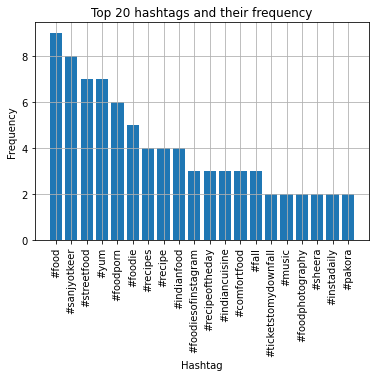

In [296]:
#Plotting a bar graph for above by considering the top 20 hashtags wrt the frequency
plt.bar(hashtags[0:20],frequency[0:20])
plt.title('Top 20 hashtags and their frequency')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [187]:
import matplotlib.pyplot as plt

#Creating an array for top 5 hashtags
hashtags_top5=[]

#Creating an array for frequency of the top 5 hashtags
frequency_top5=[]

#Getting top 5 hashtags
for i in sort_hashtags[0:5]:
    #printing the top5 hashtags and their frequencies
    print(i[0],':',i[1])
    
    #appending the hashtags in the array
    hashtags_top5.append(i[0])
    
    #appending the frequency of the hashtags in the array
    frequency_top5.append(i[1])

#food : 9
#sanjyotkeer : 8
#streetfood : 7
#yum : 7
#foodporn : 6


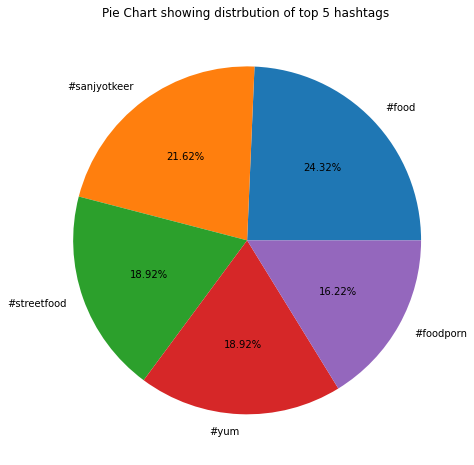

In [274]:
#plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency_top5, labels=hashtags_top5, autopct='%.2f%%')
plt.title('Pie Chart showing distrbution of top 5 hashtags ')
plt.show()

## Question 3. You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:
### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
### 2. Calculate the average likes for a handle.
### 3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
### 4. Create a bar graph to depict the above obtained information.

### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [198]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException


In [237]:
#Creating an array for appending total likes in the top 10 posts for each of the top 5 handles
total_likes=[]

#We need to get total likes of first 10 posts for each of the five handles. 
#In order to do it for 5 handles we'll need to use a for loop to get content of first ten posts for each handle
for i in range(5):
    
    #To go to the page of the handle
    driver.get('https://www.instagram.com/'+pages_top5[i]+'/')

    #To access the first post
    driver.find_element_by_xpath('//div[contains(@class,"_9AhH0")]').click()
    
    #Initialising likes to zero
    likes=0
    
    #Need to get the likes for first 10 posts of each handle. So will use a for loop
    for j in range(10):
    
        try:
            
            #Locating the like button 
            #(in case of a video, views display first which need to be clicked upon to get the likes)
            wait=WebDriverWait(driver,5)
            views=wait.until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class,"vcOH2")]')))
            views.click()
            
            #Likes now get displayed
            wait=WebDriverWait(driver,5)
            likes_on_post1=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"vJRqr")]/span')))
            s1=likes_on_post1.text
            
            #Converting string to int
            s1=s1.replace(',','')
            likes_on_post_value1=int(float(s1))
            
            likes+=likes_on_post_value1
            
            #In order to be able to click on the next button we need to implement the following first
            btn=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"QhbhU")]')))
            btn.click()
    
        except (NoSuchElementException,TimeoutException):
            #Locating the like button (in case of a normal post which shows the likes explicitly)
            wait=WebDriverWait(driver,5)
            likes_on_post2=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/button/span')))
            s2=likes_on_post2.text
            
            #Converting string to int
            s2=s2.replace(',','')
            likes_on_post_value2=int(float(s2))
            
            likes+=likes_on_post_value2
    
        #Moving onto the next post by clicking on the next button
        wait=WebDriverWait(driver,20)
        lap=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
        lap.click()

    total_likes.append(likes)

In [249]:
#Printing the total likes on top 10 posts for each of the top 5 handles
for i in range(5):
    print(str(pages_top5[i])+' '+'has'+' '+str(total_likes[i])+' '+'likes on the latest 10 posts')
    print()

foodys has 221005 likes on the latest 10 posts

buzzfeedfood has 13063 likes on the latest 10 posts

yourfoodlab has 308082 likes on the latest 10 posts

foodtalkindia has 9014 likes on the latest 10 posts

food has 9486 likes on the latest 10 posts



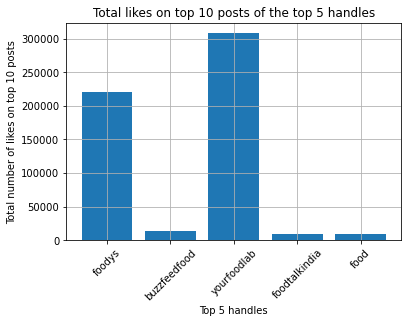

In [283]:
#Plotting a bar graph for above
plt.bar(pages_top5,total_likes)
plt.xlabel('Top 5 handles')
plt.ylabel('Total number of likes on top 10 posts')
plt.title('Total likes on top 10 posts of the top 5 handles')
plt.xticks(rotation=45)
plt.grid()
plt.show()

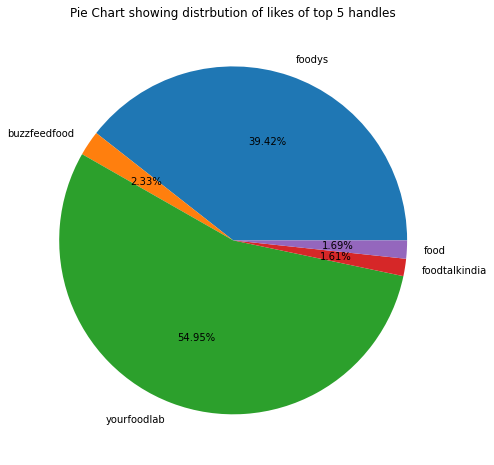

In [268]:
#Plotting a pie chart for the same
plt.figure(figsize=(8, 8))
plt.pie(total_likes, labels=pages_top5, autopct='%.2f%%')
plt.title('Pie Chart showing distrbution of likes of top 5 handles')
plt.show()

### 2. Calculate the average likes for a handle.

In [248]:
#Creating an array to get the average likes for each of the top 5 handles
avg_likes=[]

for i in total_likes:
    #Getting the average likes for each of the top 5 handles
    #Since number of posts considered is 10, avg likes = (total likes on top 10 posts)/10
    x=i/10 
    avg_likes.append(x)

#Printing the average likes for each of the top 5 handles
for i in range(5):
    print('Average likes for',pages_top5[i],':',avg_likes[i])
    print()

Average likes for foodys : 22100.5

Average likes for buzzfeedfood : 1306.3

Average likes for yourfoodlab : 30808.2

Average likes for foodtalkindia : 901.4

Average likes for food : 948.6



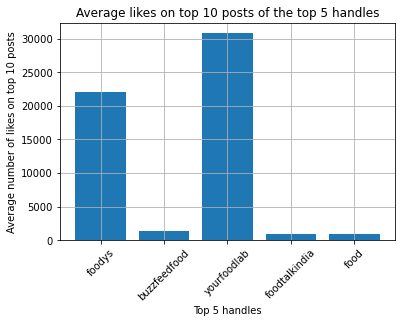

In [281]:
#Plotting a bar graph for above
plt.bar(pages_top5,avg_likes)
plt.xlabel('Top 5 handles')
plt.ylabel('Average number of likes on top 10 posts')
plt.title('Average likes on top 10 posts of the top 5 handles')
plt.xticks(rotation=45)
plt.grid()
plt.show()

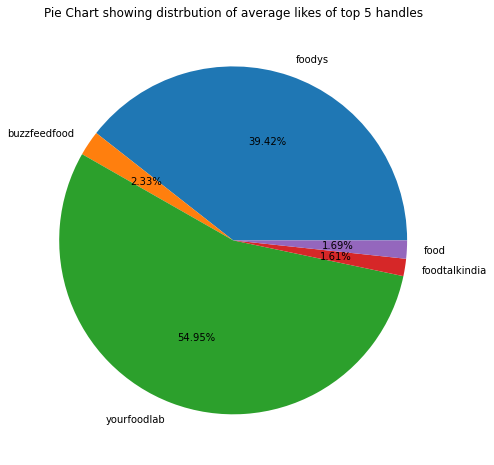

In [269]:
#Plotting a pie chart for the same
plt.figure(figsize=(8, 8))
plt.pie(avg_likes, labels=pages_top5, autopct='%.2f%%')
plt.title('Pie Chart showing distrbution of average likes of top 5 handles')
plt.show()

### 3.  Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [297]:
# We've already found out the followers for each of the top 5 handles in the first question 
#The followers are present in the followers_top5 array

#Creating an array to get average followers:like ratio for each of the five handles
ratio=[]

for i in range(len(followers_top5)):
    x=followers_top5[i]/avg_likes[i]
    ratio.append(x)
    
for i in range(5):
    print('average followers:like ratio of',pages_top5[i],'-',ratio[i])
    print()

average followers:like ratio of foodys - 410.48428768579896

average followers:like ratio of buzzfeedfood - 2805.9595804945266

average followers:like ratio of yourfoodlab - 45.20494543660454

average followers:like ratio of foodtalkindia - 335.1786110494786

average followers:like ratio of food - 81.39468690702087



### 4. Create a bar graph to depict the above obtained information.

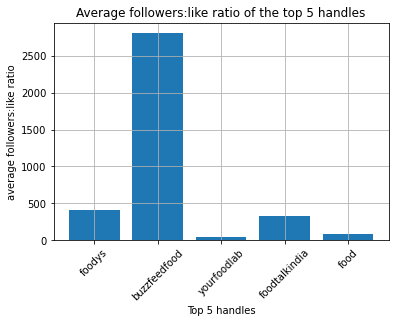

In [282]:
#Plotting a bar graph for above
plt.bar(pages_top5,ratio)
plt.xlabel('Top 5 handles')
plt.ylabel('average followers:like ratio')
plt.title('Average followers:like ratio of the top 5 handles')
plt.xticks(rotation=45)
plt.grid()
plt.show()